In [1]:
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

from i3cols_dataloader import load_data

import dragoman as dm

%load_ext line_profiler

In [2]:
plt.rcParams['figure.figsize'] = [12., 8.]
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14 
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['legend.fontsize'] = 14

In [6]:
single_hits, repeated_params, total_charge, params, labels = load_data('/home/iwsatlas1/peller/work/oscNext/level3_v01.03/140000_i3cols') #,'/home/iwsatlas1/peller/work/oscNext/level3_v01.03/120000_i3cols'])

In [37]:
hits = dm.PointData()
hits['delta_time'] = - (repeated_params[:, 3] - single_hits[:, 3])

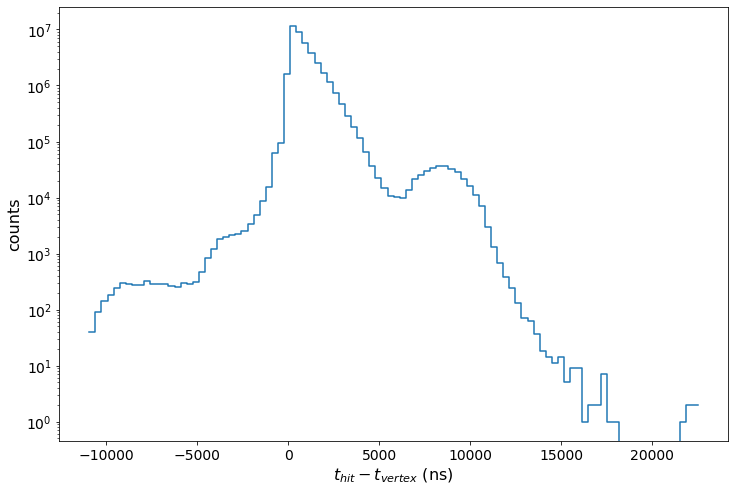

In [41]:
hits.histogram(delta_time=100).plot()
plt.gca().set_yscale('log')
plt.gca().set_xlabel(r'$t_{hit} - t_{vertex}$ (ns)')
plt.savefig('plots/delta_time_range.png')

In [7]:
params

array([[-6.9237351e-01, -8.2598778e+01, -2.6607758e+02, ...,
         2.6018322e+00,  1.4349298e+00,  1.0464038e+00],
       [-2.6776190e+01,  1.7771837e+01, -2.1290529e+02, ...,
         1.6284848e+00,  1.6346990e-01,  3.1936166e+00],
       [ 9.5040617e+00,  8.0099087e+00, -2.0220250e+02, ...,
         2.1339171e+00,  1.6225568e+00,  3.0373814e+00],
       ...,
       [ 2.3495140e+02, -3.1477621e+02, -2.1605029e+02, ...,
         1.2259212e+00,  2.3640530e+02,  9.4649780e+02],
       [-1.5321676e+00,  6.4068192e+01, -4.9373718e+02, ...,
         2.4403307e+00,  5.9060925e+02,  1.5577397e+03],
       [-3.1482880e+01,  1.2977913e+02, -1.4627943e+02, ...,
         2.0893404e+00,  7.2384076e+02,  9.6521875e+02]], dtype=float32)

In [12]:
mc = dm.PointData()
for i, label in enumerate(labels):
    mc[label] = params[:, i]

In [13]:
mc

x,-0.692,-26.8,9.5,...,235,-1.53,-31.5
y,-82.6,17.8,8.01,...,-315,64.1,130
z,-266,-213,-202,...,-216,-494,-146
time,9830,9790,9810,...,9570,9690,9470
azimuth,6.16,2.47,0.067,...,5.23,3.09,5.67
zenith,2.6,1.63,2.13,...,1.23,2.44,2.09
cascade_energy,1.43,0.163,1.62,...,236,591,724
track_energy,1.05,3.19,3.04,...,946,1560,965


/home/iwsatlas1/peller/dragoman/dragoman/core/gridarray.py:354: RuntimeWarning: divide by zero encountered in log
  ufunc, method, *inputs, **kwargs


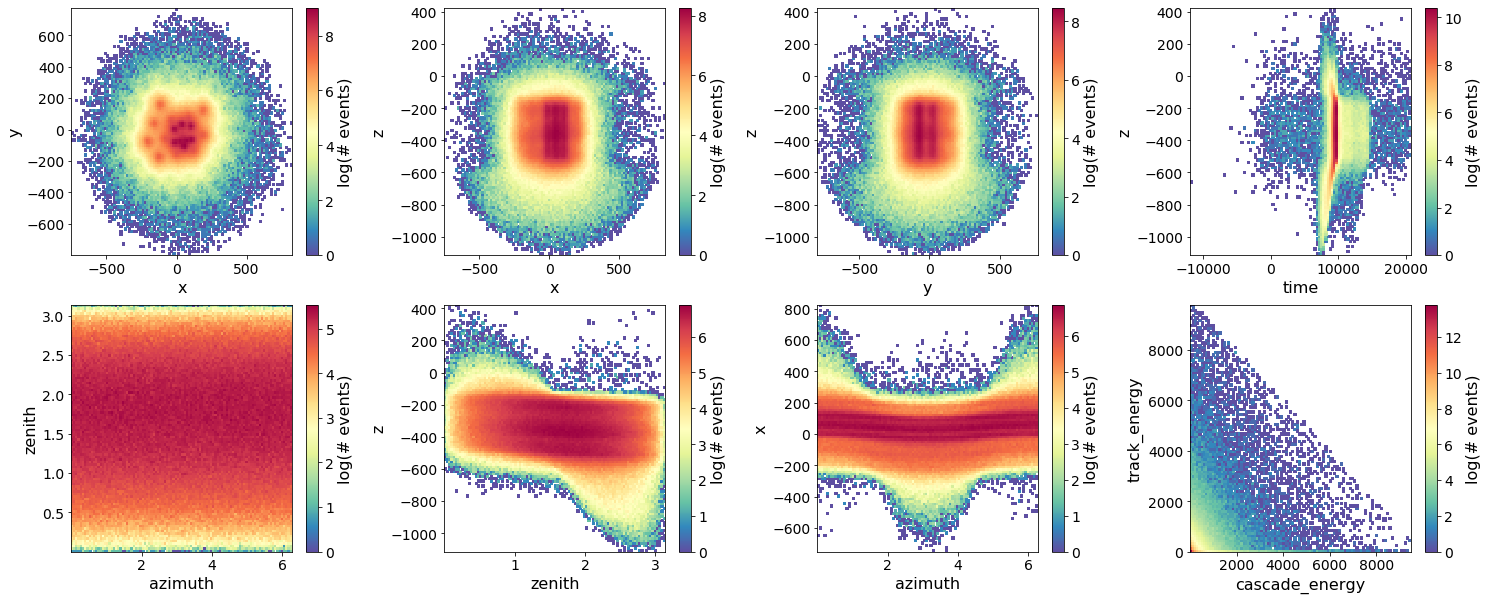

In [32]:
fig, ax = plt.subplots(2, 4, figsize=(25, 10))
plt.subplots_adjust(wspace=0.35)

def plot(x, y, ax):
    np.log(mc.histogram(**{x:100, y:100})['counts']).plot(cmap='Spectral_r', cbar=True, label='log(# events)', ax=ax)
    
plot('x', 'y', ax[0,0])
plot('x', 'z', ax[0,1])
plot('y', 'z', ax[0,2])
plot('time', 'z', ax[0,3])
plot('azimuth', 'zenith', ax[1,0])
plot('zenith', 'z', ax[1,1])
plot('azimuth', 'x', ax[1,2])
plot('cascade_energy', 'track_energy', ax[1,3])


#np.log(mc.histogram(x=100, y=100)['counts']).plot(cmap='Spectral_r', cbar=True, label='log(# events)')
#np.log(mc.kde(x=100, y=100, density=False)['counts']).plot(cmap='Spectral_r', cbar=True, label='log(# events)')
plt.savefig('plots/validity.png')

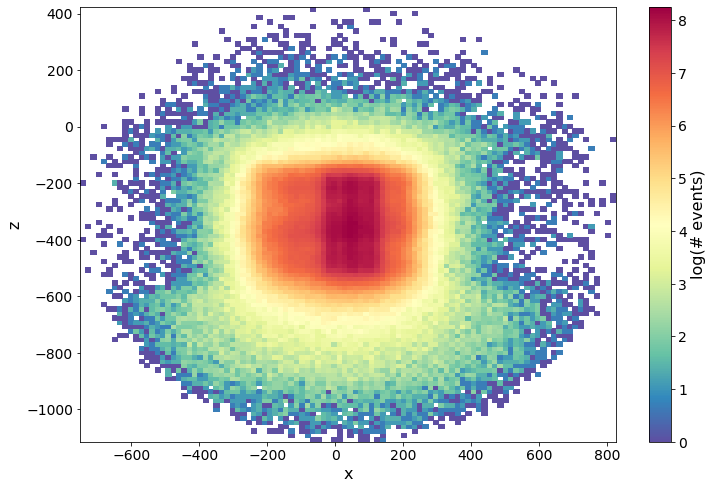

In [30]:
np.log(mc.histogram(**{'x':100, 'z':100})['counts']).plot(cmap='Spectral_r', cbar=True, label='log(# events)')

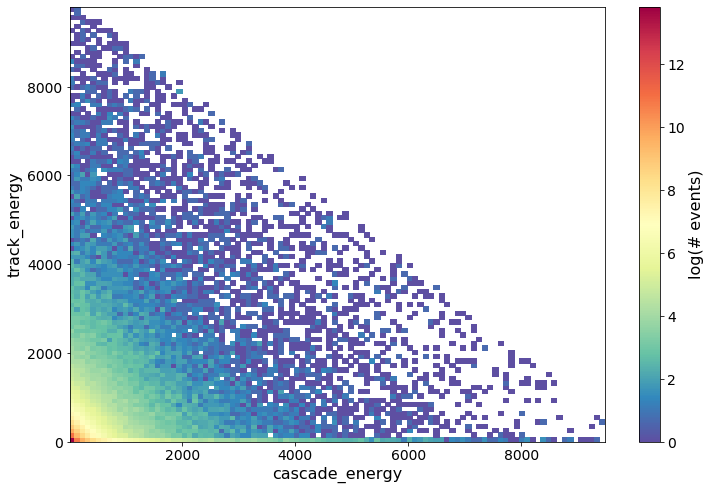

In [29]:
np.log(mc.histogram(cascade_energy=100, track_energy=100)['counts']).plot(cmap='Spectral_r', cbar=True, label='log(# events)')